# Predicting Optimal Power Consumption in Wellington's Zone 1

## Problem Statement: The aim of this project is to develop a robust machine learning model capable of accurately predicting the power consumption in Zone 1 of Wellington, New Zealand, based on environmental and meteorological variables. By leveraging advanced regression techniques, the model will provide insights that can support efficient energy resource management and optimize power usage in response to changing conditions. The ultimate goal is to help local authorities and energy providers make data-driven decisions, reducing energy waste while ensuring a reliable power supply. 

In [1]:
import numpy as np
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('City Power Consumption.xlsx')

In [3]:
df.head()

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620


In [4]:
df.shape

(52583, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  object 
 2   Humidity                      52558 non-null  object 
 3   Wind Speed                    52512 non-null  float64
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 3.6+ MB


In [6]:
df.drop('S no',axis=1,inplace=True)

In [7]:
for i in df['Temperature']:
    if type(i)==str:
        print(i)

5.488 dc
13.65 CD
12.31 dc


In [8]:
for i in df['Humidity']:
    if type(i)==str:
        print(i)

84.8 i


In [9]:
df['Temperature']=df['Temperature'].apply(lambda x:None if type(x)==str else x)

In [10]:
df['Humidity']=df['Humidity'].apply(lambda x:None if type(x)==str else x)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Temperature                   52260 non-null  float64
 1   Humidity                      52557 non-null  float64
 2   Wind Speed                    52512 non-null  float64
 3   general diffuse flows         52275 non-null  float64
 4   diffuse flows                 52568 non-null  float64
 5   Air Quality Index (PM)        52565 non-null  float64
 6   Cloudiness                    52583 non-null  int64  
 7    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 3.2 MB


In [12]:
df.isna().sum()

Temperature                     323
Humidity                         26
Wind Speed                       71
general diffuse flows           308
diffuse flows                    15
Air Quality Index (PM)           18
Cloudiness                        0
 Power Consumption in A Zone      0
dtype: int64

In [13]:
df.isna().sum()/len(df)*100

Temperature                     0.614267
Humidity                        0.049446
Wind Speed                      0.135025
general diffuse flows           0.585741
diffuse flows                   0.028526
Air Quality Index (PM)          0.034232
Cloudiness                      0.000000
 Power Consumption in A Zone    0.000000
dtype: float64

In [14]:
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
count,52260.000000,52557.000000,52512.000000,52275.000000,52568.000000,52565.000000,52583.000000,52583.000000
mean,18.827863,68.285455,1.955320,182.964247,74.872330,154.499191,0.009338,31061.821779
std,5.813053,15.545151,2.347914,264.571351,124.084858,2.871553,0.096180,8021.057455
min,3.247000,11.340000,0.050000,0.004000,0.011000,150.000000,0.000000,9457.750760
25%,14.430000,58.330000,0.078000,0.062000,0.122000,152.000000,0.000000,24738.858990
50%,18.820000,69.880000,0.086000,5.226000,4.412000,155.000000,0.000000,31189.787230
75%,22.910000,81.400000,4.915000,320.100000,100.500000,157.000000,0.000000,36721.582445
max,40.010000,94.800000,6.483000,1163.000000,936.000000,159.000000,1.000000,52204.395120


### Treating Missing Values

In [15]:
for i in df:
    df[i].fillna(df[i].median(),inplace=True)

In [16]:
df.isna().sum()

Temperature                     0
Humidity                        0
Wind Speed                      0
general diffuse flows           0
diffuse flows                   0
Air Quality Index (PM)          0
Cloudiness                      0
 Power Consumption in A Zone    0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
count,52583.000000,52583.000000,52583.000000,52583.000000,52583.000000,52583.000000,52583.000000,52583.000000
mean,18.827815,68.286244,1.952796,181.923162,74.852230,154.499363,0.009338,31061.821779
std,5.795171,15.541347,2.347332,264.143797,124.072864,2.871077,0.096180,8021.057455
min,3.247000,11.340000,0.050000,0.004000,0.011000,150.000000,0.000000,9457.750760
25%,14.450000,58.340000,0.078000,0.062000,0.122000,152.000000,0.000000,24738.858990
50%,18.820000,69.880000,0.086000,5.226000,4.412000,155.000000,0.000000,31189.787230
75%,22.870000,81.400000,4.915000,317.000000,100.450000,157.000000,0.000000,36721.582445
max,40.010000,94.800000,6.483000,1163.000000,936.000000,159.000000,1.000000,52204.395120


In [19]:
df.rename(columns={' Power Consumption in A Zone':'Target'},inplace=True)

In [20]:
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Target
0,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127
3,6.121,75.0,0.083,0.091,0.096,151.0,1,28228.86076
4,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620


### Treating Outliers

In [21]:
lst=['Wind Speed','general diffuse flows','diffuse flows']
for i in lst:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    df[i].clip(lower,upper,inplace=True)

In [22]:
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Target
count,52583.000000,52583.000000,52583.000000,52583.000000,52583.000000,52583.000000,52583.000000,52583.000000
mean,18.827815,68.286244,1.952796,179.079258,61.905300,154.499363,0.009338,31061.821779
std,5.795171,15.541347,2.347332,256.982396,84.724407,2.871077,0.096180,8021.057455
min,3.247000,11.340000,0.050000,0.004000,0.011000,150.000000,0.000000,9457.750760
25%,14.450000,58.340000,0.078000,0.062000,0.122000,152.000000,0.000000,24738.858990
50%,18.820000,69.880000,0.086000,5.226000,4.412000,155.000000,0.000000,31189.787230
75%,22.870000,81.400000,4.915000,317.000000,100.450000,157.000000,0.000000,36721.582445
max,40.010000,94.800000,6.483000,792.407000,250.942000,159.000000,1.000000,52204.395120


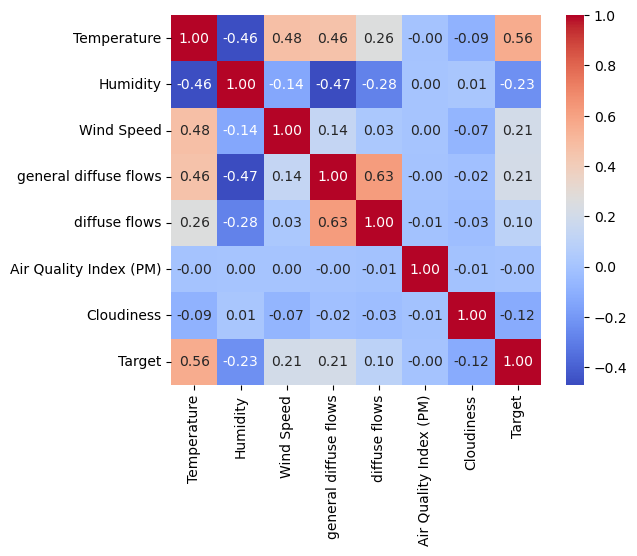

In [23]:
df.corr()
sns.heatmap(df.corr(), cbar=True, cmap='coolwarm', annot=True, square=True, fmt='.2f')
plt.show()

#### There was a noticeable correlation between general diffuse flows and diffuse flows. This makes sense as these two variables both represent aspects of solar radiation. Temperature and Humidity had a weak negative correlation, indicating that as temperature rises, humidity tends to slightly decrease. 
#### Features with a higher correlation with the target (such as temperature and diffuse flows) likely play a more significant role in predicting power consumption. In contrast, variables like cloudiness and air quality index showed little relationship with power consumption, indicating they might not contribute much to the predictive model.

### Splitting data into Features and Target

In [24]:
X=df.drop('Target', axis=1)
y=df['Target']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Splitting data into Training and Testing sets

In [26]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=36)

In [27]:
scaler=StandardScaler()

Xtrain=scaler.fit_transform(Xtrain)

Xtest=scaler.transform(Xtest)

In [28]:
def evaluation_metrics(y, y_pred):
    r2 = r2_score(y, y_pred)
    print("r2 score:", r2)

    adj_r2 = 1-(1-r2)*(len(y)-1)/(len(y)-Xtrain.shape[1]-1)
    print("Adjusted r2:", adj_r2)

    mse = mean_squared_error(y, y_pred)
    print("Mean Squared Error:", mse)

    mae = mean_absolute_error(y, y_pred)
    print("Mean Absolute Error:", mae)

    rmse = np.sqrt(mse)
    print("Root Mean Squared Error:", rmse)

### Model Training

#### 1. Linear Regression(OLS)

In [29]:
from sklearn.linear_model import LinearRegression
ols=LinearRegression(copy_X= True, fit_intercept= True, n_jobs= 1, positive= False)
ols.fit(Xtrain,ytrain)

LinearRegression(n_jobs=1)

In [30]:
#Test set prediction
ytest_pred_ols = ols.predict(Xtest)

#Train set prediction
ytrain_pred_ols = ols.predict(Xtrain)

In [31]:
print("***Test set prediction evaluation:***")
print()
evaluation_metrics(ytest, ytest_pred_ols)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain, ytrain_pred_ols)

***Test set prediction evaluation:***

r2 score: 0.32989438718505637
Adjusted r2: 0.3294480326994056
Mean Squared Error: 43606319.44089743
Mean Absolute Error: 5318.616461985711
Root Mean Squared Error: 6603.508116213489

***Train set prediction evaluation:***

r2 score: 0.3255362907683701
Adjusted r2: 0.3254240351698009
Mean Squared Error: 43267522.83158339
Mean Absolute Error: 5327.050909289381
Root Mean Squared Error: 6577.805320286044


#### Linear Regression(Stochastic Gradient Descent)

In [32]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter=1000)
sgd.fit(Xtrain,ytrain)

SGDRegressor()

In [33]:
#Test set prediction
ytest_pred_sgd = sgd.predict(Xtest)

#Train set prediction
ytrain_pred_sgd = sgd.predict(Xtrain)

In [34]:
print("***Test set prediction evaluation:***")
print()
evaluation_metrics(ytest, ytest_pred_sgd)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain, ytrain_pred_sgd)

***Test set prediction evaluation:***

r2 score: 0.32907086111576167
Adjusted r2: 0.32862395808291467
Mean Squared Error: 43659909.41262549
Mean Absolute Error: 5332.914896678382
Root Mean Squared Error: 6607.564559853009

***Train set prediction evaluation:***

r2 score: 0.3246484104473478
Adjusted r2: 0.32453600707279673
Mean Squared Error: 43324481.243927486
Mean Absolute Error: 5342.259484618564
Root Mean Squared Error: 6582.133487246175


#### 2. Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=36)
rf.fit(Xtrain, ytrain)

#Test set prediction
ytest_pred_rf = rf.predict(Xtest)

#Train set prediction
ytrain_pred_rf = rf.predict(Xtrain)

In [36]:
print("***Test set prediction evaluation:***")
print()
evaluation_metrics(ytest, ytest_pred_rf)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain, ytrain_pred_rf)

***Test set prediction evaluation:***

r2 score: 0.6331813853329868
Adjusted r2: 0.632937049021
Mean Squared Error: 23870281.612541247
Mean Absolute Error: 3411.628305155595
Root Mean Squared Error: 4885.722220157553

***Train set prediction evaluation:***

r2 score: 0.947341291883594
Adjusted r2: 0.9473325275353888
Mean Squared Error: 3378108.8952938956
Mean Absolute Error: 1267.0974549972211
Root Mean Squared Error: 1837.963246448061


#### 3. Support Vector Machine

In [37]:
from sklearn.svm import SVR

svm = SVR(kernel='linear', C=1)
svm.fit(Xtrain, ytrain)

#Test set prediction
ytest_pred_svm = svm.predict(Xtest)

#Train set prediction
ytrain_pred_svm = svm.predict(Xtrain)

In [38]:
print("***Test set prediction evaluation:***")
print()
evaluation_metrics(ytest, ytest_pred_svm)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain, ytrain_pred_svm)

***Test set prediction evaluation:***

r2 score: 0.25117285729409267
Adjusted r2: 0.2506740667337214
Mean Squared Error: 48729028.62830653
Mean Absolute Error: 5285.369393987452
Root Mean Squared Error: 6980.618069218981

***Train set prediction evaluation:***

r2 score: 0.2541110641079958
Adjusted r2: 0.25398692072145235
Mean Squared Error: 47849522.69752049
Mean Absolute Error: 5259.238980748727
Root Mean Squared Error: 6917.3349418342095


#### 4. Decision Tree

In [39]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(Xtrain, ytrain)

#Test set prediction
ytest_pred_dt = dt.predict(Xtest)

#Train set prediction
ytrain_pred_dt = dt.predict(Xtrain)

In [40]:
print("***Test set prediction evaluation:***")
print()
evaluation_metrics(ytest, ytest_pred_dt)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain, ytrain_pred_dt)

***Test set prediction evaluation:***

r2 score: 0.28554151850445897
Adjusted r2: 0.2850656207624789
Mean Squared Error: 46492529.20070198
Mean Absolute Error: 4135.235389385756
Root Mean Squared Error: 6818.543040907051

***Train set prediction evaluation:***

r2 score: 0.9998417687362432
Adjusted r2: 0.999841742400734
Mean Squared Error: 10150.694134555351
Mean Absolute Error: 1.665523698236105
Root Mean Squared Error: 100.75065327110961


#### 5. XGBoost

In [41]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(Xtrain, ytrain)

#Test set prediction
ytest_pred_xgb = xgb.predict(Xtest)

#Train set prediction
ytrain_pred_xgb = xgb.predict(Xtrain)

In [42]:
print("***Test set prediction evaluation:***")
print()
evaluation_metrics(ytest, ytest_pred_xgb)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain, ytrain_pred_xgb)

***Test set prediction evaluation:***

r2 score: 0.5569071613451422
Adjusted r2: 0.5566120190984409
Mean Squared Error: 28833735.30210024
Mean Absolute Error: 3961.5573022394997
Root Mean Squared Error: 5369.705327306168

***Train set prediction evaluation:***

r2 score: 0.6574702841445843
Adjusted r2: 0.6574132745860939
Mean Squared Error: 21973624.523332536
Mean Absolute Error: 3460.1760541817
Root Mean Squared Error: 4687.603281350986


#### 6. LightGBM Regressor

In [43]:
!pip install lightgbm

DEPRECATION: Loading egg at c:\users\admin\anaconda3\lib\site-packages\sensor-1.0.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [44]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(random_state=1, n_jobs=-1, metric='mse')
lgb.fit(Xtrain, ytrain)

#Test set prediction
ytest_pred_lgb = lgb.predict(Xtest)

#Train set prediction
ytrain_pred_lgb = lgb.predict(Xtrain)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1283
[LightGBM] [Info] Number of data points in the train set: 42066, number of used features: 7
[LightGBM] [Info] Start training from score 31049.882041


In [45]:
print("***Test set prediction evaluation:***")
print()
evaluation_metrics(ytest, ytest_pred_lgb)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain, ytrain_pred_lgb)

***Test set prediction evaluation:***

r2 score: 0.5236663469812357
Adjusted r2: 0.523349063170109
Mean Squared Error: 30996841.448218092
Mean Absolute Error: 4235.167211391371
Root Mean Squared Error: 5567.480709281182

***Train set prediction evaluation:***

r2 score: 0.557376485377644
Adjusted r2: 0.557302816525051
Mean Squared Error: 28394742.01886436
Mean Absolute Error: 4076.0263920856273
Root Mean Squared Error: 5328.671693664788


#### Of all the models applied, XGBoost Regressor proved to provide good results. Hence, we shall tune it to improve its performance and reduce the overfitting that is observed.

In [46]:
from sklearn.model_selection import GridSearchCV
xgb1 = XGBRegressor()
parameters = {'objective':['reg:linear'],
              'learning_rate': [0.05, .07, 0.09], #so called `eta` value
              'max_depth': [7,8,9],
              'subsample': [0.7,0.8],
              'n_estimators': [500,550,600,650,700]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = -1)

xgb_grid.fit(Xtrain,ytrain)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.5905130225115416
{'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 550, 'objective': 'reg:linear', 'subsample': 0.8}


In [47]:
xgb = XGBRegressor(learning_rate=0.05, max_depth=9, n_estimators=550, objective='reg:linear', subsample=0.8)
xgb.fit(Xtrain, ytrain)

#Test set prediction
ytest_pred_xgb = xgb.predict(Xtest)

#Train set prediction
ytrain_pred_xgb = xgb.predict(Xtrain)

In [48]:
print("***Test set prediction evaluation:***")
print()
evaluation_metrics(ytest, ytest_pred_xgb)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain, ytrain_pred_xgb)

***Test set prediction evaluation:***

r2 score: 0.6124896893863037
Adjusted r2: 0.6122315704240526
Mean Squared Error: 25216768.921362177
Mean Absolute Error: 3601.7226592864235
Root Mean Squared Error: 5021.630105987713

***Train set prediction evaluation:***

r2 score: 0.9045820390225655
Adjusted r2: 0.9045661579600603
Mean Squared Error: 6121157.815648217
Mean Absolute Error: 1786.2225780142187
Root Mean Squared Error: 2474.097373922097


#### Upon fine-tuning, results have definitely improved with a better r2-score and reduced mean squared error value but the issue of overfitting remains.

In [49]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Define the hyperparameter distributions
param_dist = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.5, 0.5),
    'n_estimators':stats.randint(50, 200)
}

# Create the XGBoost model object
xgb_model = XGBRegressor()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='r2')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(Xtrain, ytrain)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.08683963813494411, 'max_depth': 9, 'n_estimators': 178, 'subsample': 0.7229677306051121}
Best score:  0.581594791506199


In [56]:
xgb = XGBRegressor(learning_rate=0.08683963813494411, max_depth=9, n_estimators=178, objective='reg:linear', subsample=0.7229677306051121)
xgb.fit(Xtrain, ytrain)

#Test set prediction
ytest_pred_xgb = xgb.predict(Xtest)

#Train set prediction
ytrain_pred_xgb = xgb.predict(Xtrain)

In [57]:
print("***Test set prediction evaluation:***")
print()
evaluation_metrics(ytest, ytest_pred_xgb)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain, ytrain_pred_xgb)

***Test set prediction evaluation:***

r2 score: 0.601293405693948
Adjusted r2: 0.601027828934966
Mean Squared Error: 25945353.66069729
Mean Absolute Error: 3686.716239366294
Root Mean Squared Error: 5093.658180590575

***Train set prediction evaluation:***

r2 score: 0.824694781196074
Adjusted r2: 0.8246656039519913
Mean Squared Error: 11246005.460747005
Mean Absolute Error: 2437.0422906619033
Root Mean Squared Error: 3353.506442627926


#### Using RandomizedSearchCV, we were able to reduce overfitting by a good amount.

In [52]:
xgb = XGBRegressor(learning_rate=0.05, max_depth=9, n_estimators=550, 
                   objective='reg:linear', subsample=0.8, alpha=10, reg_lambda=10)
xgb.fit(Xtrain, ytrain)

#Test set prediction
ytest_pred_xgb = xgb.predict(Xtest)

#Train set prediction
ytrain_pred_xgb = xgb.predict(Xtrain)

In [53]:
print("***Test set prediction evaluation:***")
print()
evaluation_metrics(ytest, ytest_pred_xgb)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain, ytrain_pred_xgb)

***Test set prediction evaluation:***

r2 score: 0.6088247290168016
Adjusted r2: 0.6085641688401071
Mean Squared Error: 25455261.82390539
Mean Absolute Error: 3628.993354086122
Root Mean Squared Error: 5045.320785034921

***Train set prediction evaluation:***

r2 score: 0.8528970803809867
Adjusted r2: 0.8528725970380475
Mean Squared Error: 9436799.706331404
Mean Absolute Error: 2194.1857842694185
Root Mean Squared Error: 3071.937451565608


#### Using regularization techniques definitely improved r2-score by a good amount but didn't help in reducing the problem of overfitting.

In [58]:
xgb = XGBRegressor(learning_rate=0.08683963813494411, max_depth=9, n_estimators=178, 
                   objective='reg:linear', subsample=0.7229677306051121, alpha=10, reg_lambda=10)
xgb.fit(Xtrain, ytrain)

#Test set prediction
ytest_pred_xgb = xgb.predict(Xtest)

#Train set prediction
ytrain_pred_xgb = xgb.predict(Xtrain)

In [59]:
print("***Test set prediction evaluation:***")
print()
evaluation_metrics(ytest, ytest_pred_xgb)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain, ytrain_pred_xgb)

***Test set prediction evaluation:***

r2 score: 0.596528501098939
Adjusted r2: 0.5962597504573643
Mean Squared Error: 26255424.115117952
Mean Absolute Error: 3725.468723070268
Root Mean Squared Error: 5124.00469507181

***Train set prediction evaluation:***

r2 score: 0.7732459874822808
Adjusted r2: 0.773208247264305
Mean Squared Error: 14546497.134650365
Mean Absolute Error: 2757.717924087614
Root Mean Squared Error: 3813.987039129835


In [72]:
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold

# Define your X and y (features and target)
X = df.drop('Target', axis=1)
y = df['Target']

# Define the model
xgb_model = XGBRegressor(objective='reg:squarederror')

# Hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'reg_alpha': [0.1, 1,10],  # L1 regularization
    'reg_lambda': [1, 1.5, 2]  # L2 regularization
}

# Setup cross-validation using K-Fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=kfold, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(Xtrain, ytrain)

# Print best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best R2 score:", grid_search.best_score_)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best hyperparameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300, 'reg_alpha': 10, 'reg_lambda': 2}
Best R2 score: 0.5548956209320139


In [73]:
xgb = XGBRegressor(learning_rate=0.05, max_depth=7, n_estimators=300, 
                   objective='reg:linear', subsample=0.8, alpha=10, reg_lambda=2)
xgb.fit(Xtrain, ytrain)

#Test set prediction
ytest_pred_xgb = xgb.predict(Xtest)

#Train set prediction
ytrain_pred_xgb = xgb.predict(Xtrain)

In [74]:
print("***Test set prediction evaluation:***")
print()
evaluation_metrics(ytest, ytest_pred_xgb)
print()
print("***Train set prediction evaluation:***")
print()
evaluation_metrics(ytrain, ytrain_pred_xgb)

***Test set prediction evaluation:***

r2 score: 0.5733638459916728
Adjusted r2: 0.5730796654723028
Mean Squared Error: 27762836.2767657
Mean Absolute Error: 3910.213265253369
Root Mean Squared Error: 5269.04510103735

***Train set prediction evaluation:***

r2 score: 0.6712699104495645
Adjusted r2: 0.6712151976570672
Mean Squared Error: 21088364.667174734
Mean Absolute Error: 3406.6910064255917
Root Mean Squared Error: 4592.206949515095


### Conclusion: 
### The cross-validated fine-tuning process resulted in better generalization compared to previous models. The R² score on the test set is now 0.5734, indicating that the model explains about 57.34% of the variance in power consumption. This is an improvement over previous versions of the model but still leaves room for enhancement. 
### I would go with the version which gave r2 score as 0.60 for the test set and 0.77 for the training set.
### There is now a closer match between the train and test performance metrics, which suggests that overfitting has been reduced. The gap between the R² scores for the training and test sets is narrower compared to earlier iterations.